In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import sklearn as sci
%matplotlib inline
%load_ext autoreload
%autoreload

df_ori = pd.read_csv('adyen-dataset.csv')
from lib.sampling import subsampling

# Subsample non_fraudulent transactions records so we have balanced dataset
df_fraudulent = df_ori[df_ori['has_fraudulent_dispute'] == True]
df_non_fraudulent = df_ori[df_ori['has_fraudulent_dispute'] == False]
subsample_index= subsampling(df_non_fraudulent.index, len(df_fraudulent))
df_non_fraudulent_subsample  = df_non_fraudulent.loc[subsample_index,:]
df_sample = pd.concat([df_non_fraudulent_subsample,df_fraudulent], axis=0)
df_sample.shape

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(21432, 20)

In [36]:
df_sample.head()

,psp_reference,merchant,card_scheme,year,hour_of_day,minute_of_hour,day_of_year,is_credit,eur_amount,ip_country,issuing_country,device_type,ip_address,email_address,card_number,shopper_interaction,zip_code,card_bin,has_fraudulent_dispute,is_refused_by_adyen
100589,66904306057,Merchant A,Amex,2021,14,33,221,True,119.63,BR,BR,iOS,YWjJwmlGJPixXGE7ZiOc4Q,vsN6dDbqNIUqyUeIbhBITg,RjBk2c9SfCBlEj6aLUmRhg,Ecommerce,BZD,4571,False,True
132541,62106400109,Merchant B,Visa,2021,17,38,246,True,106.18,ZW,ZW,Linux,Bhh4hDFEn9SUmPl7DewmQA,WUC-fSELqJQytILNQ_0t4w,pba__PLPD4rLYK47CM5FzQ,Ecommerce,DB,4236,False,False
128249,42993811077,Merchant D,MasterCard,2021,9,57,57,True,87.62,BR,GR,Linux,226YyIHbGmxQYR0GmCHGFw,jXsu5-CEfb-MIUbeNmwSjg,cwzUvZ9jRQVfj6qqmvOsZw,POS,BZD,4916,False,False
92433,74853496154,Merchant A,Other,2021,17,21,175,True,18.64,BR,BR,MacOS,NaN,fDVfUMF3SCYrOilj9x_ZIw,FvjlLMaOnhk88dByaG3Geg,Ecommerce,BZD,4622,False,False
132819,68447486793,Merchant D,Other,2021,7,28,10,True,120.65,BR,BR,Other,NaN,oPosT9sFfAE0yPXqJuKnng,O8Nz0WMnwQsdxSX68o7kKg,Ecommerce,BZD,4891,False,False


In [37]:
total_fraud = df_sample[df_sample['has_fraudulent_dispute']==1].shape[0]
total_not_fraud = df_sample[df_sample['has_fraudulent_dispute']==0].shape[0]
total_fraud_na_ip = df_sample[df_sample['ip_address'].isna() & df_sample['has_fraudulent_dispute']==1].shape[0]
total_not_fraud_na_ip = df_sample[df_sample['ip_address'].isna() & df_sample['has_fraudulent_dispute']==0].shape[0]
p_likelihood_fraud = total_fraud_na_ip/total_fraud
p_likelihood_not_fraud = total_not_fraud_na_ip/total_not_fraud
p_prior_no_fraud = 0.5
p_prior_fraud = 0.5
p_posterio = p_likelihood_fraud * p_prior_fraud/(p_likelihood_fraud * p_prior_fraud + p_likelihood_not_fraud * p_prior_no_fraud)
p_posterio

0.0998040313549832

In [75]:
df_sample = df_sample.fillna("anonymous")

In [262]:
edges1 = df_sample.groupby(["ip_address","card_number"]).agg(total_transactions=('has_fraudulent_dispute','size'), total_fraud=('has_fraudulent_dispute','sum')).reset_index()
edges1['type_in'] = 'ip'
edges1['type_out'] = 'card'
edges1.columns=["point_in","point_out","total_transactions","total_fraud","type_in","type_out"]
edges1

,point_in,point_out,total_transactions,total_fraud,type_in,type_out
0,--2E0toluie1TqMY-oXrQg,GOgdL2ymYoPD99nIT1zbkA,1,1,ip,card
1,--2E0toluie1TqMY-oXrQg,vtGsRvD7aYpa-LJdW8sbyg,5,5,ip,card
2,-0KPDZ04oHcWYb579pGDNw,5ocC9lnu7b22vFKTsBZPVQ,1,0,ip,card
3,-0jK02r79jRQ2Nzmcbd51Q,GaTo2bLUxy-n939nv2g-ag,1,1,ip,card
4,-0mAboSyixPty7xuAAnWTA,E3wWIIUb7J4HBwfTbCTB2w,1,1,ip,card
...,...,...,...,...,...,...
13999,zyWMrWSG-p1u_9-bgdLgyA,gG2Nyn0zUqgqxPNPp7Ps7A,1,0,ip,card
14000,zyb5ISuOdXMGndU6Rqq5lg,rucjIQnNfn0vKD5W08stDQ,1,0,ip,card
14001,zyt9qkmd5Fg_WxwAuKSTkQ,6t9pJxuaEpQIgF45FFahfg,1,0,ip,card
14002,zz7sHLxN1lPPA4WlxSpiJw,0JnGW7gBQOREAyoCa2gEjQ,1,0,ip,card


In [263]:
edges2 = df_sample.groupby(["ip_address","email_address"]).agg(total_transactions=('has_fraudulent_dispute','size'), total_fraud=('has_fraudulent_dispute','sum')).reset_index()
edges2['type_in'] = 'ip'
edges2['type_out'] = 'email'
edges2.columns=["point_in","point_out","total_transactions","total_fraud","type_in","type_out"]
edges2

,point_in,point_out,total_transactions,total_fraud,type_in,type_out
0,--2E0toluie1TqMY-oXrQg,eErppXRkq-p_C8ginsSiOQ,6,6,ip,email
1,-0KPDZ04oHcWYb579pGDNw,b-tLUTPfEfa2l0Eui-v9UQ,1,0,ip,email
2,-0jK02r79jRQ2Nzmcbd51Q,anonymous,1,1,ip,email
3,-0mAboSyixPty7xuAAnWTA,wlpo3xiAoV0KC0ndCnyiQg,1,1,ip,email
4,-1I5QWw03mL1yTPQQfQd1w,lBEp5B7QqM5AqZcdXdBt-g,1,1,ip,email
...,...,...,...,...,...,...
13848,zyWMrWSG-p1u_9-bgdLgyA,1JT5yMFbjV0J1jTIXfn5XQ,1,0,ip,email
13849,zyb5ISuOdXMGndU6Rqq5lg,f34_y0qww-IH7er7Ppyiog,1,0,ip,email
13850,zyt9qkmd5Fg_WxwAuKSTkQ,tekJgTRstbm1UmyYcpF53w,1,0,ip,email
13851,zz7sHLxN1lPPA4WlxSpiJw,anonymous,1,0,ip,email


In [264]:
edges3 =df_sample.groupby(["email_address","card_number"]).agg(total_transactions=('has_fraudulent_dispute','size'), total_fraud=('has_fraudulent_dispute','sum')).reset_index()
edges3['type_in'] = 'email'
edges3['type_out'] = 'card'
edges3.columns=["point_in","point_out","total_transactions","total_fraud","type_in","type_out"]
edges3

,point_in,point_out,total_transactions,total_fraud,type_in,type_out
0,--58rRRUeyFG-y_jcju51Q,L1BXwyigFMYGEKbI3we34g,1,0,email,card
1,--Bvl6WxZlN8C5M7oieKtA,yKJA0yAKMFw4y0LrDD9JTw,1,0,email,card
2,--MhWq3tmEoMi4ue4Kxk5w,DRgcTBhL5gROs2p5_Gc5gg,1,0,email,card
3,-0ZQwT16Q5y-VFpWswWc_Q,ctvJdP0df5k3Gf3zOfdgng,1,0,email,card
4,-17204BlewoWuAwUqbQlFg,_PVpnNY-Gtrp89MW5AVerw,1,0,email,card
...,...,...,...,...,...,...
12392,zyyDrH9wronGeR0FKCU0kQ,a7J4OkbL30z_vZZG1ngTkQ,12,12,email,card
12393,zyyDrH9wronGeR0FKCU0kQ,zCfWu9gLgYRIPsMkjQhUlQ,1,1,email,card
12394,zyyrkdL1kPmFYW55oV1JsA,eVTsPXWuXZRsGIP9xZXWWw,1,0,email,card
12395,zzTiEkkk7H-sqCJZtwgDMg,X53VJ7mZWbfbqWvvZxLpgQ,1,0,email,card


In [266]:
df_edges = pd.concat([edges1,edges2,edges3], axis=0)
df_edges = df_edges[df_edges['total_transactions']>0]
df_edges

,point_in,point_out,total_transactions,total_fraud,type_in,type_out
0,--2E0toluie1TqMY-oXrQg,GOgdL2ymYoPD99nIT1zbkA,1,1,ip,card
1,--2E0toluie1TqMY-oXrQg,vtGsRvD7aYpa-LJdW8sbyg,5,5,ip,card
2,-0KPDZ04oHcWYb579pGDNw,5ocC9lnu7b22vFKTsBZPVQ,1,0,ip,card
3,-0jK02r79jRQ2Nzmcbd51Q,GaTo2bLUxy-n939nv2g-ag,1,1,ip,card
4,-0mAboSyixPty7xuAAnWTA,E3wWIIUb7J4HBwfTbCTB2w,1,1,ip,card
...,...,...,...,...,...,...
12392,zyyDrH9wronGeR0FKCU0kQ,a7J4OkbL30z_vZZG1ngTkQ,12,12,email,card
12393,zyyDrH9wronGeR0FKCU0kQ,zCfWu9gLgYRIPsMkjQhUlQ,1,1,email,card
12394,zyyrkdL1kPmFYW55oV1JsA,eVTsPXWuXZRsGIP9xZXWWw,1,0,email,card
12395,zzTiEkkk7H-sqCJZtwgDMg,X53VJ7mZWbfbqWvvZxLpgQ,1,0,email,card


In [268]:
import networkx as nx

source = 'point_in'
target = 'point_out'

G = nx.from_pandas_edgelist(df_edges, source=source, target = target, edge_attr='total_transactions')
print(f"number of nodes {len(G.nodes)}")
print(f"number of edges {len(G.edges)}")

number of nodes 31092
number of edges 39511


Text(0, 0.5, 'Frequency')

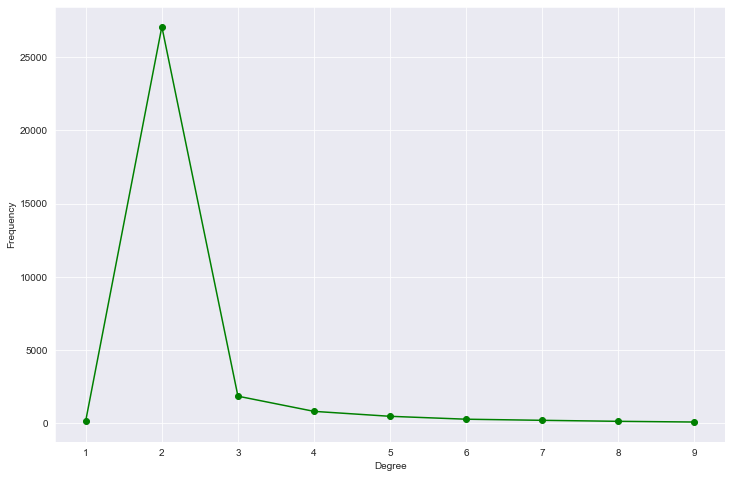

In [269]:
m=1
degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8))
plt.plot(degrees[m:10], degree_freq[m:10],'go-')
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [302]:
degree_fraud_map = {}
degree_transaction_map = {}
degree_fraud_odds_raito_map = {}

for n, d in G.degree():
    if d not in degree_fraud_map:
        degree_fraud_map[d] = 0
        degree_transaction_map[d] = 0
    if len(df_edges[df_edges['point_in']==n])>0:
        degree_fraud_map[d] += df_edges[df_edges['point_in'] == n]['total_fraud'].sum()
        degree_transaction_map[d] += df_edges[df_edges['point_in'] == n]['total_transactions'].sum()
        continue
    if len(df_edges[df_edges['point_out']==n])>0:
        degree_fraud_map[d] += df_edges[df_edges['point_out'] == n]['total_fraud'].sum()
        degree_transaction_map[d] += df_edges[df_edges['point_out'] == n]['total_transactions'].sum()
        continue
    raise Exception("node name not found in df_edges")

<AxesSubplot:xlabel='node degree', ylabel='fraud odds'>

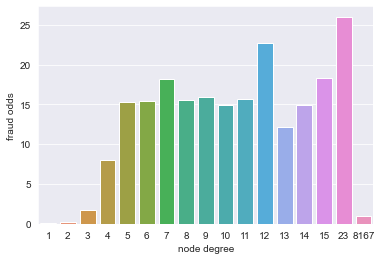

In [314]:
for degree, fraud in degree_fraud_map.items():
    degree_fraud_odds_raito_map[degree] = fraud/(degree_transaction_map[degree]-fraud)
degree_fraud_map_sorted = dict(sorted(degree_fraud_odds_raito_map.items()))
df_degree_fraud_odds = pd.DataFrame(degree_fraud_map_sorted.items(),columns=["node degree","fraud odds"])
sns.barplot(data=df_degree_fraud_odds,x="node degree",y="fraud odds")

We treat every transaction's ip, bank account number and online purchase email as a node on the graph, then connect them (if a transaction uses the IP: A, account B, then connect AB). When node degrees larger > 4, the fraud rate increases dramatically by 10 times.

really hard to draw graph as too many nodes and edges

In [190]:
# generate node color map so that we allocate color to each node based on the node type
nodes_color_map_list = []
type_color_map = {
    "ip": "yellow",
    "card": "green",
    "email": "red",
}

# node size will be defined by the total number of fraud of given information (ip/email/card)
nodes_size_map_list = []

for v in G.nodes():
    if len(df_sample[df_sample['ip_address'] == v]) > 0:
        nodes_color_map_list.append(type_color_map['ip'])
        nodes_size_map_list.append(len(df_sample[(df_sample['ip_address'] == v) & (df_sample['has_fraudulent_dispute'] == 1)]))
        continue
    if len(df_sample[df_sample['card_number'] == v]) > 0:
        nodes_color_map_list.append(type_color_map['card'])
        nodes_size_map_list.append(len(df_sample[(df_sample['card_number'] == v) & (df_sample['has_fraudulent_dispute'] == 1)]))
        continue
    if len(df_sample[df_sample['email_address'] == v]) > 0:
        nodes_color_map_list.append(type_color_map['email'])
        nodes_size_map_list.append(len(df_sample[(df_sample['email_address'] == v) & (df_sample['has_fraudulent_dispute'] == 1)]))
        continue
    raise Exception("Sorry, not matched label")

In [315]:
nodes_size_map_list_transformed = np.array(nodes_size_map_list) * 10

In [211]:
from networkx.algorithms.community import greedy_modularity_communities

#the function will return a partition of nodes
c = list(greedy_modularity_communities(G, resolution=0.0001)) # If resolution is less than 1, modularity favors larger communities. Greater than 1 favors smaller communities.
print(f"number of communities found {len(c)}")

number of communities found 1220


In [194]:
#create a larger figure
plt.figure(figsize=(32, 32))

#place nodes according to the force-directed algorithm
pos = nx.spring_layout(G, k=5, iterations=2000, weight='weight', scale=5) # output a dict with the country code as key and pos as value

nx.draw_networkx(G, pos=pos, with_labels=False, node_color=nodes_color_map_list, edge_color="lightgray", alpha=0.6, node_size=nodes_size_map_list)
plt.show()

KeyboardInterrupt: 

<Figure size 2304x2304 with 0 Axes>